# Statistical Regression Analysis

Regression analysis is a statistical method that investigates the relationship between one or more independent variables $X$ and a dependent variable $Y$.

> $Y$, the dependent variable may sometimes be called as:
* regressand,
* [endogenous](https://dictionary.cambridge.org/dictionary/english/endogenous?ysclid=lp5khu2u01113902) variable,
* response variable,
* target variable,
* measured variable or
* criterion variable
>> This variable is also sometimes known as the $\text{predicted variable}$, but this should not be confused with $\text{predicted values}$, which are denoted ${\hat {y}}$.

> $X$, the independent variables may sometimes be called as:
* regressors,
* [exogenous](https://dictionary.cambridge.org/dictionary/english/exogenous) variables,
* explanatory variables,
* covariates,
* input variables,
* predictor variables

<br>

$\mathbf{Aim}$

Regression analysis aims to determine how changes in the independent variables affect or predict the value of the dependent variable. For example,

$$ Y= a + bX \quad or \quad Y=a + bX^2, \quad \text{etc.}$$

Here, $Y$ is the $dependent$ variable, whose values depend on the $independent$ variable $X$ that takes on values independently from the variable $Y$.

# Linear Regression

Linear regression, the most commonly used form of regression, $\textbf{assumes a linear relationship}$ between the dependent variable and the independent variables. This means that the change in $Y$ can be predicted by a $\textbf{straight line}$ that represents the relationship between $X$ and $Y$.

The equation for linear regression is:

<br>

$$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + ϵ$$

where

* $Y$ is the dependent variable
* $X_1, X_2, ..., X_n$ are the independent variables
* $β_0$ is the intercept, or the value of $Y$ when all independent variables are equal to 0
* $β_1, β_2, ..., β_n$ are the coefficients for each independent variable
* ε is the error term, which represents the variability in the response that is not explained by the independent variables

> This equation represents a straight line that best fits the data points.

> The intercept term, $β_0$ represents the mean value of $Y$ when all independent variables are zero.

> The slope coefficients $β_1, β_2, ..., β_p$ represent the change in $Y$ for a one-unit change in each independent variable, holding all other independent variables constant.

$\textbf{Interpretation of Coefficients:}$

A positive coefficient indicates that an increase in the independent variable $X$, which is associated with an increase in the dependent variable $Y$, while a negative coefficient indicates that an increase in the independent variable but is associated with a decrease in the dependent variable $Y$. That is,

> $ -β ⇒ Y ↓ \quad$ and $\quad +β ⇒ Y \uparrow$









## Underlying Rational

Let's make a "number guessing" game such that

* For each round of the game play, system generates 10 numbers and asks players for the next number

* then, each player makes a guess

* and, whose guess is most close to the generated number will be the winner for the current round.

Aim of the play is to make such guesses that produce the $\text{least squared difference}$ from the generated number in $n$ rounds of the game.

That is, if $\hat{y}_i$ is the guess on round $i$ and the generated number is $y_i$, after $n$ rounds of the game, the winner would be the one who has the smallest sum of squared difference from the generated number in every round:

$$S=\sum_{i=1}^n \left( \hat{y}_i - y_i \right)^2 = \sum_{i=1}^n r_i^2$$

where $r_i = \hat{y_i} - y_i$ is called the *residual*.

So, the **Objective** of our "guess what's next" game is to mimimize $S$


In [2]:
import random as rnd
mu = rnd.randint(20, 50)
sig = rnd.randint(10, 20)
Y = [round(rnd.normalvariate(mu,sig)) for i in range(10)]
print(Y)

[3, 23, 36, 52, 0, 10, 58, 54, -6, 32]


In [3]:
# Next number generator
player1_guess = 25
player2_guess = 32
y_next = round(rnd.normalvariate(mu,sig))
print("Generated number: ", y_next)
print("Residual for Player 1 = %d" % (player1_guess - y_next)**2)
print("Residual for Player 2 = %d" % (player2_guess - y_next)**2)

Generated number:  28
Residual for Player 1 = 9
Residual for Player 2 = 16


### The best guess on the long run

The **best guess** that could produce the least squared difference on the long run would be the **arithmetic mean** of the numbers that the system generated before asking players for the guess.

The formula for artihmetic mean is given by

$$ \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i $$

That is, for two points in one dimension, or rather a line, the closest point to both points is the point that is on the half-way in between them, i.e., the middle of the two points or line.

In general, for $n$ points, the closest point ($c$) to $n$ points is the point that the distance from each of the $n$ points sums up to 0 over all points:

$$ \sum_{i=1}^n \left(y_i - c\right) = 0$$

Here, the $c$ value that holds the equation true is $c = \bar{y}$.

In [9]:
# Empirical validation.
mean = sum(Y)/len(Y)

sum_of_differences = sum( [(y - mean) for y in Y] )
print("The values:", Y, "\nn = ", len(Y))
print("Arithmetic mean (i.e. Best Guess): ", mean)
print("Sum of differences from the mean: %d" % sum_of_differences)

The values: [3, 23, 36, 52, 0, 10, 58, 54, -6, 32] 
n =  10
Arithmetic mean (i.e. Best Guess):  26.2
Sum of differences from the mean: 0


$\mathbf{Proof}:$

Substitude $c$ by $\bar{y}$ in the equation $\sum_{i=1}^n \left(y_i - c\right)=0$, then we have

$$\sum_{i=1}^n \left(y_i - \bar{y}\right) = 0$$

Expand summation to paranthesis:

$$\sum_{i=1}^n y_i - \sum_{i=1}^n\bar{y} = 0$$
$$\sum_{i=1}^n y_i - n\bar{y} = 0$$

Substitude $\bar{y}$ formula:

$$\sum_{i=1}^n y_i - n\left(\frac{1}{n}\sum_{i=1}^n y_i\right) = 0$$

It immediately follows that

$$\sum_{i=1}^n y_i - \sum_{i=1}^n y_i = 0 $$


In [ ]:
# 10 rounds game play
best_guess = sum(Y)/len(Y)
print(f"the best guess: {best_guess}\n")
sum_of_squared_residuals = 0;
for i in range(10):
  y_next = round(rnd.normalvariate(mu,sig))
  r_i_square = (best_guess - y_next)**2
  sum_of_squared_residuals += r_i_square
  print(f"Round {i+1}")
  print("Generated number: ", y_next)
  print("squared residual = %d\n---------------" % r_i_square)

print("\nOver 10 rounds\n-----------")
print("Least sum of squared residuals: %d" % sum_of_squared_residuals)

## Errors vs Residuals

In statistics, $errors$ and $residuals$ are two closely related and *easily confused* measures of the deviation/difference of an *observed value* in a statistical sample from its *true value* in the population.

> The **error** of an observation is the deviation of the observed value from the true value of a quantity of interest in the population.

> The **residual** is the difference between the observed value and the estimated value of the quantity of interest using a statistical sample from the population.

### Examples

$\textbf{Statistical }\textbf{Error}$:

Let's say the mean height in a population of 21-year-old men is 1.75 meters. Assume that we randomly choose one man and his height is 1.80 meters tall. Then the "error" is 0.05 meters; if the randomly chosen man is 1.70 meters tall, then the "error" is −0.05 meters.

> Important note: The mean of the entire population is typically unobservable, and hence in practice the statistical error cannot be observed either.

<br>

$\textbf{Residual}:$

A residual (or fitting deviation), on the other hand, is an observable estimate of the unobservable statistical error:

$$ \hat{ϵ} = \text{residual}$$

Consider the previous example with men's heights and suppose we have a random sample of $n$ people. Then we have:

> The difference between the height of each man in the sample ($y_i$) and the unobservable population mean $\mu$ is a statistical error,

$$ \epsilon_i = y_i - \mu $$

whereas

> The difference between the height of each man in the sample ($y_i$) and the observable sample mean $\bar{y}$ is a residual:

$$ r_i = y_i - \bar{y}$$

Note here that the sample mean could serve as a good estimator of the population mean.

<br>

---

### In Regression

In regression analysis, the distinction between **errors** and **residuals** is subtle and important, and leads to the concept of *studentized residuals*.

The equation for linear regression is:

<br>

$$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + ϵ$$

<br>

Here, $\epsilon$ is the error.

That is,

Given an unobservable function that relates the independent variable $Y$ to the dependent variable $X$, say a line, the deviations of the observed values of $Y$ from this function are the unobservable errors. In other words, we don't know the actual equation of the function that relates the $Y$ to $X$, but if we were to know it, we could calculate the error, though we cannot.

On the other hand, if one runs a regression on some data, then the deviations of the observed values of $Y$ from the fitted function (i.e., the predicted values) are the residuals, or the estimate of the error:

$$ \hat{\epsilon} = \text{residual} = \hat{y} - y$$


If the linear model is applicable, a scatterplot of residuals plotted against the independent variable should be random about zero with no trend to the residuals.

# Simple Linear Regression

Simple linear regression is a statistical method used to model the relationship between a dependent variable and a single independent variable. In other words, it examines how a change in the independent variable is associated with a change in the dependent variable. The relationship is often represented by a straight line, which is why it's called "linear" regression.

The basic form of a simple linear regression equation is:

$$ Y = \beta_0 + \beta_1X + \varepsilon $$

The goal of simple linear regression is to estimate the values of $\beta_0$ and $\beta_1$ that minimize the sum of the squared differences between the observed values of $Y$ and the values predicted by the regression equation.

That is, estimate the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals:

$$ \arg\min_{\beta_0, \beta_1} \hskip0.5em \sum_{i=1}^{n}\left(\hat{y}_i - y_i\right)^2 \quad \text{or}\quad \arg\min_{\beta_0, \beta_1} \hskip0.5em \sum_{i=1}^{n}r_i^2\quad \text{or}\quad \arg\min_{\beta_0, \beta_1} \hskip0.5em \sum_{i=1}^{n}\hat{\varepsilon}_i^2$$

### Estimation of the parameter values $\beta_0$ and $\beta_1$

#### Least Sequares

The goal is to find estimated values $\hat{\beta}_0$ and
$\hat{\beta}_1$ for the parameters $\beta_0$ and $\beta_1$, which would provide the "best" fit in some sense for the data points.

Here the "best" fit will be understood as in the least-squares approach: a line that minimizes the sum of squared residuals $\varepsilon_i$ (differences between actual and predicted values of the dependent variable y), each of which is given by, for any candidate parameter values

$$Q = \arg \min_{\beta_0,\beta_1}\hspace0.5em\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i}-\beta_0 -\beta_1 x_{i})^{2}$$

<br>

By expanding to get a quadratic expression in $\beta_0$ and $\beta_1$, we can derive values of $\beta_0$ and $\beta_1$
that minimize the objective function $Q$

$$ \widehat {\beta_0 }={\bar {y}}-({\widehat {\beta_1 }}{\bar {x}})$$

and

$$ \widehat {\beta_1 }=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\quad\left[=\frac{s_{x,y}}{s^2_x}=\rho_{xy}\frac{s_y}{s_x}\right]$$

where,

* $\bar {x}$ and $\bar {y}$ are the mean of the $x_i$ and $y_i$, respectively.
* $s^2_x$ and $s_x$ are the sample variance and the sample standard deviation for the observed values of $X$, respectively
* $s_y$ is the sample standard deviation for the observed values of $Y$
* $s_{x,y}$ is the sample covariance between the observed values of $X$ and $Y$, i.e., variance of $(x_i,y_i)$ pairs.
* $ρ_{xy}$ is the correlation between $X$ and $Y$, where $\rho$ stands for Pearson's correlation coefficient, given by

<br>

$$
\begin{align}
\rho_{xy}&=
\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}
{ \sqrt{\sum _{i=1}^{n}(x_{i}-\bar{x})^{2}}
  \sqrt{\sum _{i=1}^{n}(y_{i}-\bar{y})^{2}} }\\\\
  &=\frac{s_{x,y}}{s_{x}\hspace0.1ems_{y}}
\end{align}
$$

<br>

Substituting the above expressions for $\widehat{\beta_0}$ and
$\widehat{\beta_1}$ into

$$ y={\widehat {\beta_0 }}+{\widehat {\beta_1 }}x,$$

yields

$$\frac{y-\bar{y}}{s_y}=\rho_{xy}\frac{x-\bar{x}}{s_x}$$

This shows that $\rho_{xy}$ is the slope of the regression line of the standardized data points (and that this line passes through the origin). Since $-1 \le \rho \le +1$ then we get that if $x$ is some measurement and $y$ is a followup measurement from the same item, then we expect that $y$ (on average) will be closer to the mean measurement than it was to the original value of $x$. This phenomenon is known as [regressions toward the mean](https://en.wikipedia.org/wiki/Regression_toward_the_mean#Definition_for_simple_linear_regression_of_data_points).

#### Example

Let's consider a simple example involving the relationship between the number of hours a student studies ($X$) and their exam score ($Y$). We want to use simple linear regression to model and understand this relationship.

Let's assume we have the following data:

\begin{align*}
\text{Hours Studied (X)} & : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] \\
\text{Exam Score (Y)} & : [50, 55, 60, 65, 70, 73, 77, 80, 82, 84]
\end{align*}

We want to find a linear relationship between the hours studied ($X$) and the exam score ($Y$).

The simple linear regression equation is:

$$ Y = \beta_0 + \beta_1X + \epsilon $$

Here, we are trying to find the values of $\beta_0$ and $\beta_1$ that best fit our data. The goal is to minimize the difference between the actual exam scores and the scores predicted by our linear model.

For the example, the equation can be rewritten as:

$$ \text{Exam Score} = \beta_0 + \beta_1 \times \text{Hours Studied} $$

In the following cell the parameter values are calculated as $ \beta_0 = 44 $ and $ \beta_1 = 4 $. Thus, our regression equation becomes:

$$ \text{Exam Score} = 44 + 4 \times \text{Hours Studied} $$

Now, if a student studies for 4 hours ($X = 4$), we can predict their exam score $Y$ using the regression equation:

$$ \text{Exam Score} = 40 + 5 \times 4 = 60 $$

So, according to our model, a student who studies for 4 hours is predicted to score 60 on the exam. This is a simplified example, and in practice, more sophisticated statistical techniques are used to estimate the regression parameters and assess the model's accuracy.

In [14]:
import math

# Example data
hours_studied = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
exam_scores = [50, 55, 60, 65, 70, 73, 77, 80, 82, 84]

# Number of data points
n = len(hours_studied)

# Calculate the mean of X and Y
mean_x = sum(hours_studied) / n
mean_y = sum(exam_scores) / n

# Calculate the slope (beta_1)
numerator = sum((hours_studied[i] - mean_x) * (exam_scores[i] - mean_y) for i in range(n))
denominator = sum((hours_studied[i] - mean_x) ** 2 for i in range(n))

beta_1 = numerator / denominator

# Calculate y-intercept (beta_0)
beta_0 = mean_y - beta_1 * mean_x

# Display the results
print("Estimated beta_0 (y-intercept): %d" % math.floor(beta_0))
print("Estimated beta_1 (slope): %d" % round(beta_1))


Estimated beta_0 (y-intercept): 44
Estimated beta_1 (slope): 4


## Visual Inspection

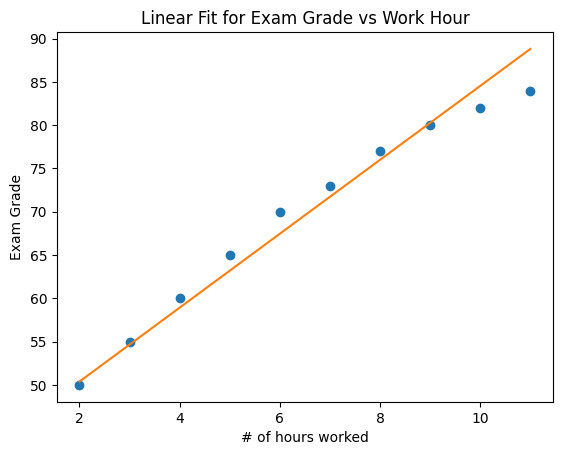

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y = [50, 55, 60, 65, 70, 73, 77, 80, 82, 84]

# Calculate the mean of the independent variable
x_mean = np.mean(x)

# Calculate the mean of the dependent variable
y_mean = np.mean(y)

# Calculate the covariance between the independent and dependent variables
covariance = np.cov(x, y)[0, 1]

# Calculate the variance of the independent variable
variance_x = np.var(x)

# Calculate the slope of the fitted line
slope = covariance / variance_x

# Calculate the intercept of the fitted line
intercept = y_mean - slope * x_mean

# Calculate the predicted values of the dependent variable
y_pred = [slope * x_i + intercept for x_i in x]

# Plot the data points and the fitted line
plt.plot(x, y, 'o')
plt.plot(x, y_pred)

# Add labels and colorbar
plt.xlabel('# of hours worked')
plt.ylabel('Exam Grade')
plt.title('Linear Fit for Exam Grade vs Work Hour')
plt.show()


### Residual Analysis

Recall that,

if one runs a regression on some data, then the deviations of the observed values of Y from the fitted function (i.e., the predicted values) are the residuals, or the estimate of the error:

$$ \hat{\epsilon} = \text{residual} = \hat{y} - y$$

> If the linear model is applicable, a scatterplot of residuals plotted against the independent variable should be random about zero with no trend to the residuals.

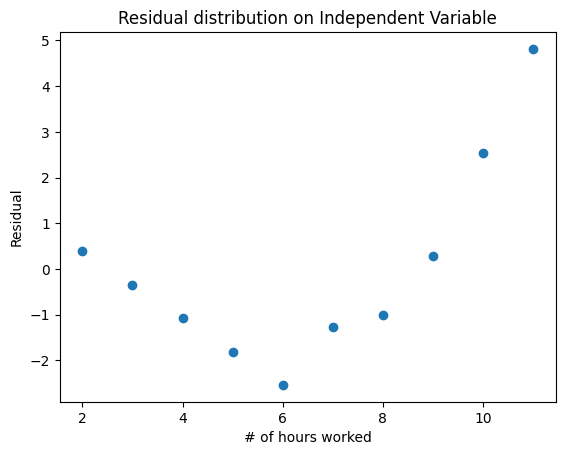

In [21]:
import matplotlib.pyplot as plt

residuals = [y_hat-y for y_hat, y in zip(y_pred, y)]

plt.plot(x, residuals, 'o')

plt.xlabel('# of hours worked')
plt.ylabel('Residual')
plt.title('Residual distribution on Independent Variable')
plt.show()


This plot show that residuals do not distribute randomly about zero, instead they appear to be following a trend. This suggest that the actual relationship between $Y$ and $X$ may not be a linear function.

The parabolic shape of the fluctuations about
$r_{i}=0$ indicates a parabolic model is appropriate.

Thus, we may adapt a higher order polinomial model, for example quadratic, to explain the relationship between $Y$ and $X$, such that

$$ Y = \beta_0 + \beta_1 x^2 + ɛ$$

# Matrix Notation for Linear Regression

The equation for linear regression of the dependent variable $Y$ against $p$ independent variable $X_1,X_2,\dots,X_p$ is given by:

<br>

$$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_pX_p + ϵ$$

Given a data set

$$\{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$$

of $n$ observations on $Y$ and $X_1,X_2,\dots,X_p$ ($i=1,\dots,n$), a linear regression model assumes that the relationship between the dependent variable $Y$ and the vector of regressors $\mathbf{x}_i$ is linear. This relationship is modeled through a *disturbance term* or *error variable* $\varepsilon$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form

$$y_{i}=\beta_{0}+\beta_{1}x_{i1}+\cdots+\beta_{p}x_{ip}+\varepsilon_{i}=\mathbf{x}_{i}^{\mathsf{T}}{\boldsymbol {\beta}}+\varepsilon_{i},\qquad i=1,\ldots ,n,$$

where $\mathsf{T}$ denotes the transpose, so that $\mathbf{x}_{i}^{\mathsf{T}}{\boldsymbol {\beta}}$ is the inner product between vectors $\mathbf{x}_i$ and $\boldsymbol{\beta}$.

That is, we have a dataset that in fact is constituting a system of $n$ linear equations:

$$
\begin{align}
y_1 &= \beta_0 + \beta_1 x_{11} + \beta_2 x_{12} + \cdots + \beta_p x_{1p} + \varepsilon_{1}\\
y_2 &= \beta_0 + \beta_1 x_{21} + \beta_2 x_{22} + \cdots + \beta_p x_{2p} + \varepsilon_{2}\\
\vdots & \hspace10em \vdots\\
y_n &= \beta_0 + \beta_1 x_{n1} + \beta_2 x_{n2} + \cdots + \beta_p x_{np} + \varepsilon_{n}
\end{align}
$$

Often these n equations are stacked together as given above and written in matrix notation as

$$\mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},$$

where

$ \mathbf {y} ={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{bmatrix}}_{n\times1},\quad$
$\mathbf{X} ={\begin{bmatrix}\mathbf{x}_{1}^{\mathsf{T}}\\\mathbf{x}_{2}^{\mathsf{T}}\\\vdots \\\mathbf{x}_{n}^{\mathsf{T}}\end{bmatrix}}={\begin{bmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{bmatrix}}_{n\times(p+1)},\quad$
${\boldsymbol{\beta}}={\begin{bmatrix}\beta_{0}\\\beta_{1}\\\beta_{2}\\\vdots \\\beta_{p}\end{bmatrix}}_{(p+1)\times1},\quad$
$\boldsymbol{\varepsilon }={\begin{bmatrix}\varepsilon_{1}\\\varepsilon_{2}\\\vdots \\\varepsilon_{n}\end{bmatrix}}_{n\times1}.$

# Ordinary Least Squares - OLS

The OLS method minimizes the sum of squared residuals, and leads to a *closed-form expression* for the estimated value of the unknown parameter vector $\boldsymbol{\beta}$:

$${\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\rm {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\rm {T}}\mathbf {y}$$

> Note: Although this equation is correct and can work in many applications, it is not computationally efficient to invert the normal-equations matrix

### Derivation

The original system of equations is:

$$\mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}.$$

Multiply both sides of the equation by $\mathbf{X}^{\rm T}$,

$$\mathbf{X}^{\rm T}\mathbf {y} =\mathbf{X}^{\rm T}\mathbf {X} {\boldsymbol {\beta }}$$

Then, solve for $\boldsymbol{\beta}$

$${\boldsymbol {\beta }}= (\mathbf{X}^{\rm T}\mathbf {X})^{-1}\mathbf{X}^{\rm T}\mathbf {y} $$


## Example

Let's use, as an example, a reduced set of Exam Scores:

\begin{align*}
\text{Hours Studied (X)} & : [2, 3, 4, 5] \\
\text{Exam Score (Y)} & : [50, 55, 60, 65]
\end{align*}

Here, we have a system of 4 equations:

\begin{align*}
 \beta_0 + 2 \beta_1  & = 50 \\
 \beta_0 + 3 \beta_1  & = 55 \\
 \beta_0 + 4 \beta_1  & = 60 \\
 \beta_0 + 5 \beta_1  & = 65
\end{align*}

----

#### Overdetermined Systems

With four equations in two unknowns, this system of equations is overdetermined.

> There is no exact solution.

To consider approximate solutions, one introduces residuals $r_{1}, r_{2}, r_3, r_{4}$ into the equations:

\begin{align*}
 \beta_0 + 2 \beta_1 + r_1 & = 50 \\
 \beta_0 + 3 \beta_1 + r_2 & = 55 \\
 \beta_0 + 4 \beta_1 + r_3 & = 60 \\
 \beta_0 + 5 \beta_1 + r_4 & = 65
\end{align*}

The $i^{th}$ residual $r_{i}$ is the misfit between the $i^{th}$ observation $y_{i}$ and the $i^{th}$ prediction
$\beta_{0} + \beta_{1}x_{i}$:

\begin{align*}
 r_1 &= 50 - (\beta_0 + 2 \beta_1)\\
 r_2 &= 55 - (\beta_0 + 3 \beta_1)\\
 r_3 &= 60 - (\beta_0 + 4 \beta_1)\\
 r_4 &= 65 - (\beta_0 + 5 \beta_1)
\end{align*}

> Among all approximate solutions, we would like to find the one that is "best" in some sense.

In least squares, we focuses on the sum of the squared residuals, $S$:

$$ S = \sum_{i=1}^{4} r^2_i$$

### Gradients and Normal Equations

The minimum of the sum of squared residuals is found by setting the gradient to zero. Since the example model contains 2 parameters, $\beta_0$ and $\beta_1$ there are 2 gradient equations:

$$\frac{\partial S}{\partial \beta_0}=\frac{\partial S}{\partial r_i}\frac{\partial r_i}{\partial \beta_0}= 2\sum_{i=1}^{4}r_i\frac{\partial r_i}{\partial \beta_0}=0$$

$$\frac{\partial S}{\partial \beta_1}=\frac{\partial S}{\partial r_i}\frac{\partial r_i}{\partial \beta_1}= 2\sum_{i=1}^{4}r_i\frac{\partial r_i}{\partial \beta_1}=0$$

These equations are called as *normal equations* and constitute a system of two linear equations in two unknowns. Thus, now, the system has a unique solution and hence the unknow parameters $\beta_0$ and $\beta_1$ can be obtained.

### Using Matrices

This calculation can be expressed in matrix notation as follows. The original system of equations is $\mathbf{y} =\mathbf{X}\boldsymbol{\beta}$, where

$$\mathbf{y}=\left[{\begin{array}{c}50\\55\\60\\65\end{array}}\right], \quad
\mathbf{X}=\left[{\begin{array}{cc}1&2\\1&3\\1&4\\1&5\end{array}}\right], \quad
\boldsymbol{\beta} =\left[{\begin{array}{c}\beta _{0}\\\beta_{1}\end{array}}\right].$$

Obtain values for $\beta_0$ and $\beta_1$ using the equation:

$${\boldsymbol{\beta}}= (\mathbf{X}^{\rm T}\mathbf {X})^{-1}\mathbf{X}^{\rm T}\mathbf {y} $$

That is,

$$ \left[{\begin{array}{c}\beta _{0}\\\beta_{1}\end{array}}\right]=\left(\left[{\begin{array}{cccc}1&1&1&1\\2&3&4&5\end{array}}\right]\cdot\left[{\begin{array}{cc}1&2\\1&3\\1&4\\1&5\end{array}}\right]\right)^{-1}\cdot\left[{\begin{array}{cccc}1&1&1&1\\2&3&4&5\end{array}}\right]\cdot \left[{\begin{array}{c}50\\55\\60\\65\end{array}}\right]$$


## Running Examples

### Linear Model for Exam Grades Example

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
hours_studied = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
exam_scores = [50, 55, 60, 65, 70, 73, 77, 80, 82, 84]

# Add a column of ones to X for the intercept term
X = np.column_stack((np.ones_like(hours_studied), hours_studied))
y = exam_scores

# Use the ordinary least squares method to find beta_0 and beta_1
# "@" is the matrix multiplication operator in Python
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract beta_0 and beta_1
beta_0 = np.floor(beta[0])
beta_1 = round(beta[1])

# Display the results
print("Estimated beta_0 (y-intercept): %d" % math.floor(beta_0))
print("Estimated beta_1 (slope): %d" % round(beta_1))


Estimated beta_0 (y-intercept): 44
Estimated beta_1 (slope): 4


In [ ]:
# Calculate the predicted values of the dependent variable
y_pred = [beta_1 * x_i + beta_0 for x_i in x]

# Plot the data points and the fitted line
plt.plot(x, y, 'o')
plt.plot(x, y_pred)

# Add labels and colorbar
plt.xlabel('# of hours worked')
plt.ylabel('Exam Grade')
plt.title('Linear Fit for Exam Grade vs Work Hour')
plt.show()

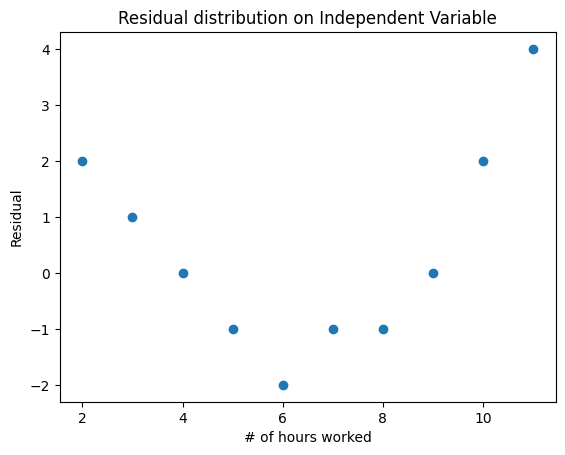

In [39]:
import matplotlib.pyplot as plt

residuals = [y_hat-y for y_hat, y in zip(y_pred, y)]

plt.plot(x, residuals, 'o')

plt.xlabel('# of hours worked')
plt.ylabel('Residual')
plt.title('Residual distribution on Independent Variable')
plt.show()


### Parabolic Model for Exam Grades Example

Results of the residual analysis suggests that the relationship between $X$ and $Y$ is quadratic rather than linear. Thus, let's try to fit to the data at hand:

$$y=\beta_0 + \beta_1 x + \beta_2 x^2$$

**Important Note**
> this model is still linear in the unknown parameters, so linear least squares still applies.

The system of equations incorporating residuals is

\begin{alignedat}{2}
50&&\;=\beta_0+\beta_{1}(2)+\beta_{2}(2)^{2}+r_{1}\\
55&&\;=\beta_0+\beta_{1}(3)+\beta_{2}(3)^{2}+r_{2}\\
60&&\;=\beta_0+\beta_{1}(4)+\beta_{2}(4)^{2}+r_{3}\\
65&&\;=\beta_0+\beta_{1}(5)+\beta_{2}(5)^{2}+r_{4}\\
\end{alignedat}

In [53]:
import numpy as np

# Example data
hours_studied = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
exam_scores = [50, 55, 60, 65, 70, 73, 77, 80, 82, 84]

# Add a column of ones to X for the intercept term
x = hours_studied
x_square = [x**2 for x in hours_studied]
X = np.column_stack((np.ones_like(x), x, x_square))
print(X)
y = exam_scores

# Use the ordinary least squares method to find beta_0 and beta_1
# "@" is the matrix multiplication operator in Python
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Display the results
print("Estimated beta_0 : %.4f" % beta[0])
print("Estimated beta_1 : %.4f" % beta[1])
print("Estimated beta_2 : %.4f" % beta[2])


[[  1   2   4]
 [  1   3   9]
 [  1   4  16]
 [  1   5  25]
 [  1   6  36]
 [  1   7  49]
 [  1   8  64]
 [  1   9  81]
 [  1  10 100]
 [  1  11 121]]
Estimated beta_0 : 36.8970
Estimated beta_1 : 6.7970
Estimated beta_2 : -0.2273


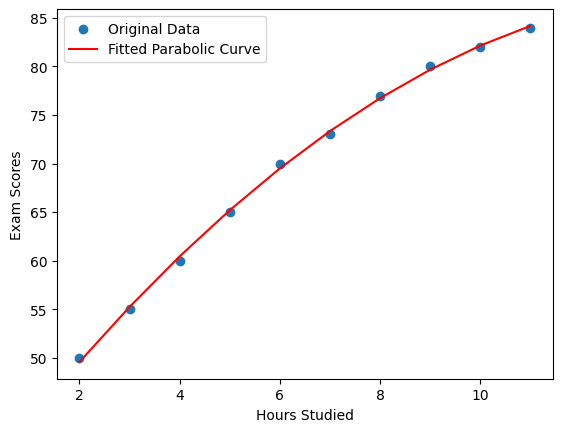

In [58]:
import matplotlib.pyplot as plt

# Plot the original data
plt.scatter(hours_studied, exam_scores, label='Original Data')

# Plot the fitted parabolic curve
x_values = np.array(hours_studied)
y_pred = beta[0] + beta[1] * x_values + beta[2] * x_values**2
plt.plot(x_values, y_pred, color='red', label='Fitted Parabolic Curve')

# Add labels and legend
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.legend()

# Display the plot
plt.show()

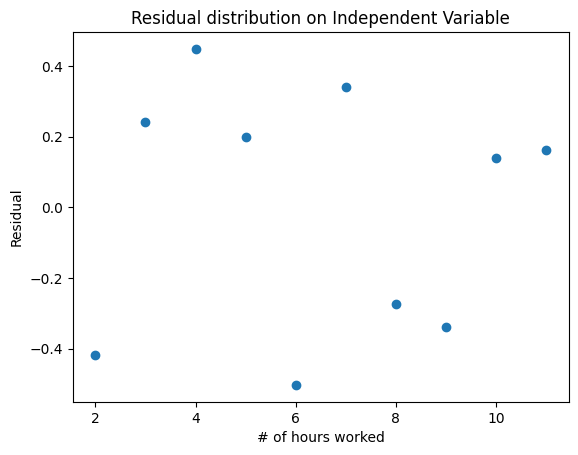

In [59]:
# Residual analysis
import matplotlib.pyplot as plt

y = exam_scores
residuals = [y_hat-y for y_hat, y in zip(y_pred, y)]

plt.plot(x, residuals, 'o')

plt.xlabel('# of hours worked')
plt.ylabel('Residual')
plt.title('Residual distribution on Independent Variable')
plt.show()
